# Curve fitting



<img src=https://raw.githubusercontent.com/hamzafar/image_repo/master/future_risk.PNG width="600" > 

Accroding to RBI API-581, Inspection plan is developed to determine the risk. Inspection effectiveness is introduced into the POF calculation using Bayesian Analysis, which updates the POF when additional data is gathered through inspection as shown in following equations:
$$R(t, IE) = P(t,IE).CA$$
$$R(t, IE) = P(t,IE).FC$$



## *Proposed Solution*

<img src=https://raw.githubusercontent.com/hamzafar/image_repo/master/curve_fitting.jpg width="600">







### Import Libaraies

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [3]:
import statsmodels.api as sm

In [4]:
from datetime import datetime
import time
import math
from time import mktime

In [5]:
from sklearn.svm import SVR

# Regression Equation

### *Convert Date into int/float*

In [6]:
def convert_sec(s = "2010-12-31 0:0:0"):
    d = datetime.strptime(s, "%Y-%m-%d %H:%M:%S")
    return(time.mktime(d.timetuple()))

In [7]:
lst = []
tmp_lst =[]
xint_lst=[]
time_range=pd.DatetimeIndex(start='2010', end='2029', freq='A') 
for i in time_range:
    tmp_lst.append(convert_sec(str(i)))
    
min_val = min(tmp_lst)
max_val = max(tmp_lst)

for i in tmp_lst:
    norm = (i-min_val)/(max_val-min_val)
    lst.append([norm])
    xint_lst.append(norm)
    
# lst

In [8]:
risk = [float(i**2) for i in [5,10,15,20,25,30,35,40,45,50]]
# risk = [float(i**2) for i in [5,10,15]]
cur_interval = lst[0:10]
# print cur_interval

In [9]:
X = np.sort(cur_interval, axis=0)
X1 = lst[0:len(lst)]
y= np.array(risk)


In [10]:
# svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.2)
# svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=50e3, degree=2)
# y_rbf = svr_rbf.fit(X, y).predict(X1)
# y_lin = svr_lin.fit(X, y).predict(X1)
y_poly = svr_poly.fit(X, y).predict(X1)

In [11]:
risk_target=5000

### *convert normailzed date to actual date*

In [12]:
def denorm(norm = 0.4):
    denorm = norm*(max_val- min_val) + min_val
    return denorm

In [13]:
def convert_date(timestamp = convert_sec()):
    dt_obj = datetime.fromtimestamp(timestamp)
    return(dt_obj)

In [14]:
targ_val = np.interp(risk_target, y_poly, np.array(xint_lst))

In [15]:
st= convert_date(denorm(targ_val))
# print str(st)

## Draw Chart

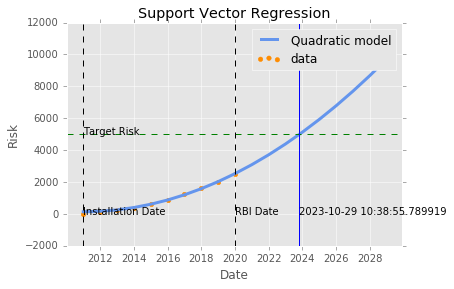

In [17]:
lw = 3
plt.scatter(time_range[0:10], y, color='darkorange', label='data')
plt.hold('on')

plt.plot(time_range, y_poly, color='cornflowerblue', lw=lw, label='Quadratic model')

plt.axhline(y=risk_target, color='g',ls='dashed')
plt.axvline(x=time_range[0], color='k',ls='dashed')
plt.axvline(x=time_range[9], color='k',ls='dashed')

plt.axvline(x=convert_date(denorm(targ_val)))

plt.text(x=time_range[0], y=0, s='Installation Date' )
plt.text(x=time_range[9], y=0, s='RBI Date' )
plt.text(x=convert_date(denorm(targ_val)), y=0, s=str(st))
plt.text(x=time_range[0], y=risk_target, s='Target Risk' )

plt.xlabel('Date')
plt.ylabel('Risk')
plt.title('Support Vector Regression')
plt.legend()

plt.show()


# Forecasting 


In [18]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA

In [19]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [20]:
import statsmodels.api as sm

D:\DATO\Anaconda2\envs\gl-env\lib\site-packages\statsmodels\tsa\arima_model.py:1847: FutureWarning: TimeSeries is deprecated. Please use Series
  forecast = TimeSeries(forecast, index=self.data.predict_dates)


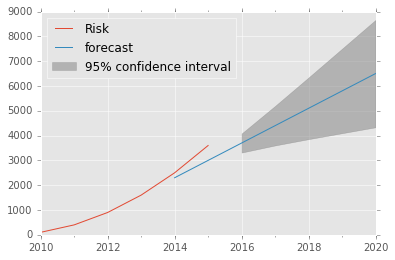

In [21]:
dta = pd.DataFrame({"Risk":[float(i**2) for i in [10,20,30,40,50,60]]})
dta.index = pd.DatetimeIndex(start='2010', end='2016', freq='A')
res = sm.tsa.ARIMA(dta, (1, 1, 0)).fit()

fig, ax = plt.subplots()
ax = dta.ix['2010':].plot(ax=ax)
fig = res.plot_predict('2014', '2020', dynamic=True, ax=ax,
                        plot_insample=False)
plt.show()

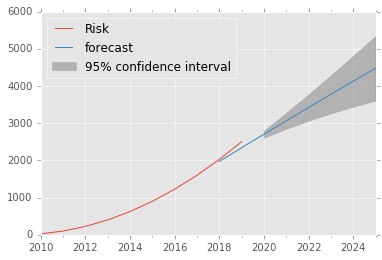

In [22]:
dta = pd.DataFrame({"Risk":[float(i**2) for i in [5,10,15,20,25,30,35,40,45,50]]})
dta.index = pd.DatetimeIndex(start='2010', end='2020', freq='A')
res = sm.tsa.ARIMA(dta, (1, 1, 0)).fit()


fig, ax = plt.subplots()
ax = dta.ix['2010':].plot(ax=ax)
fig = res.plot_predict('2018', '2025', dynamic=True, ax=ax,
                        plot_insample=False)
plt.show()